## Import Libraries ##

In [1]:
import math
import warnings

from IPython.display import display
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import ensemble
%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

### Description of Iris Dataset ###

*  This is one of the most famous datasets in the world.  The dataset was used in a famous paper by Fisher (1936).

* Dataset contains three species of Iris for the purposes of classification using sepal and petal measurements.

* Contains 50 examples of each species for 150 datapoints total.

* Attribute information:
  1. sepal length in cm 
  2. sepal width in cm 
  3. petal length in cm 
  4. petal width in cm 
  5. class:
    * Iris Setosa 
    * Iris Versicolour  
    * Iris Virginica

* References:

* Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936).

In [4]:
# bring in dataset
iris = pd.read_csv('./iris.data')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.100,3.500,1.400,0.200,Iris-setosa
1,4.900,3.000,1.400,0.200,Iris-setosa
2,4.700,3.200,1.300,0.200,Iris-setosa
3,4.600,3.100,1.500,0.200,Iris-setosa
4,5.000,3.600,1.400,0.200,Iris-setosa


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


### Set up Models ###

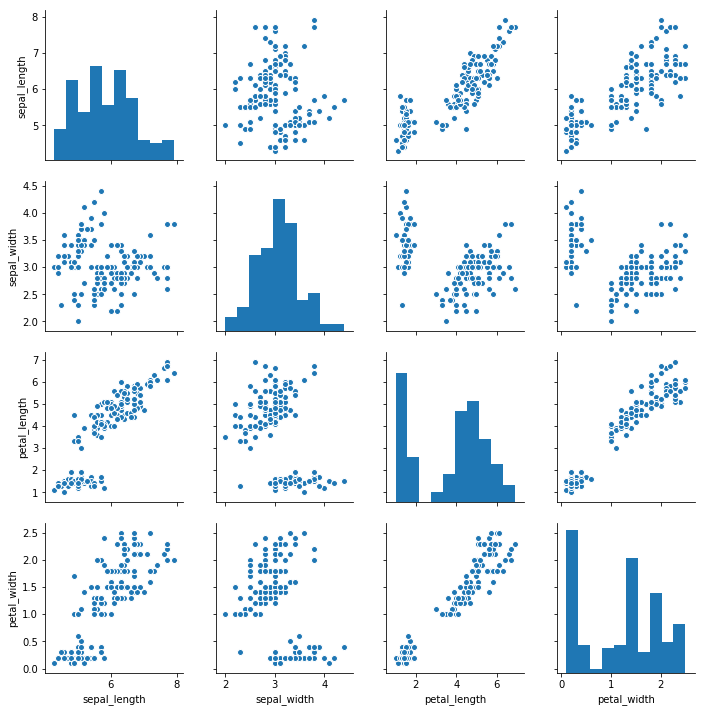

In [8]:
sns.pairplot(iris)

In [13]:
X = iris.iloc[:,:-1]
Y = iris.iloc[:,-1]

In [22]:
clf1 = tree.DecisionTreeClassifier(random_state=0,max_depth=3)

In [26]:
cvscore = cross_val_score(clf1, X, Y, cv=10)

print(cvscore)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore.mean(), cvscore.std()))


[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
-------------------------------------------------------------
mean cv score = 0.960 +- 0.033


In [27]:
clf2 = tree.DecisionTreeClassifier(random_state=0,max_depth=4)

In [28]:
cvscore = cross_val_score(clf2, X, Y, cv=10)

print(cvscore)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore.mean(), cvscore.std()))


[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
-------------------------------------------------------------
mean cv score = 0.953 +- 0.043


In [29]:
clf3 = tree.DecisionTreeClassifier(random_state=0,max_depth=5)

In [30]:
cvscore = cross_val_score(clf3, X, Y, cv=10)

print(cvscore)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore.mean(), cvscore.std()))


[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
-------------------------------------------------------------
mean cv score = 0.960 +- 0.044


In [31]:
clf4 = tree.DecisionTreeClassifier(random_state=0,max_depth=2)

In [32]:
cvscore = cross_val_score(clf4, X, Y, cv=10)

print(cvscore)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore.mean(), cvscore.std()))


[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.86666667 1.         1.         1.        ]
-------------------------------------------------------------
mean cv score = 0.947 +- 0.050


In [34]:
clf5 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=3)

In [35]:
cvscore = cross_val_score(clf5, X, Y, cv=10)

print(cvscore)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore.mean(), cvscore.std()))


[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
-------------------------------------------------------------
mean cv score = 0.960 +- 0.033


In [36]:
clf6 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=5)

In [37]:
cvscore = cross_val_score(clf6, X, Y, cv=10)

print(cvscore)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore.mean(), cvscore.std()))

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
-------------------------------------------------------------
mean cv score = 0.960 +- 0.044


* In general, decision trees do well on this dataset.

* The best in terms of mean/std ratio of cv score (accuracy) is criterion = "gini or "entropy" with max depth=3

* I go with clf1 as the best overall decision tree classifier.

### Random Forest Classifier ###

* Let's just pick a small number of trees in the ensemble and see how it works.

In [38]:
rfc1 = ensemble.RandomForestClassifier()

In [39]:
cvscore = cross_val_score(rfc1, X, Y, cv=10)

print(cvscore)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore.mean(), cvscore.std()))

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.86666667 0.93333333 1.         1.        ]
-------------------------------------------------------------
mean cv score = 0.947 +- 0.050


In [40]:
rfc2 = ensemble.RandomForestClassifier(max_depth=3)

In [41]:
cvscore = cross_val_score(rfc2, X, Y, cv=10)

print(cvscore)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore.mean(), cvscore.std()))

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
-------------------------------------------------------------
mean cv score = 0.960 +- 0.044


*  This matches the performance of the best decision tree.

* It uses 10 trees in the ensemble

In [42]:
rfc3 = ensemble.RandomForestClassifier(n_estimators=5,max_depth=3)

In [43]:
cvscore = cross_val_score(rfc2, X, Y, cv=10)

print(cvscore)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore.mean(), cvscore.std()))

[0.93333333 0.93333333 1.         0.93333333 0.86666667 0.93333333
 0.86666667 1.         1.         1.        ]
-------------------------------------------------------------
mean cv score = 0.947 +- 0.050


* smaller number of trees seems to do worse.

* Just go with 10 trees in the forest each with max depth = 3

In [44]:
import time

In [61]:
start_time = time.time()
clf1 = tree.DecisionTreeClassifier(random_state=0,max_depth=3)
cvscore = cross_val_score(clf1, X, Y, cv=10)
print("---Decision Tree takes %s seconds ---" % (time.time() - start_time))

---Decision Tree takes 0.022917509078979492 seconds ---


In [62]:
start_time = time.time()
rfc2 = ensemble.RandomForestClassifier(max_depth=3)
cvscore = cross_val_score(rfc2, X, Y, cv=10)
print("--- Small (n=10) Random Forest takes %s seconds ---" % (time.time() - start_time))

--- Small (n=10) Random Forest takes 0.15711474418640137 seconds ---


* practically the same amount of time to complete 10-fold CV with modern computers.

* Ultimately Random Forest should have greater generalization power at a modest increased computer expense.